# UCI Iris Dataset 

## Objective:
To find the species of the flower using the machine learning algorithm 

In [57]:
# Calling the basic library for analysis of datasets
import numpy as np
import pandas as pd

# Calling the visualisation libraries
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns

# Machine Learning Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from xgboost import XGBClassifier

In [15]:
# Reading the Iris dataset
iris = pd.read_csv('D:/GitHub Repositories/iris-species/iris.csv', index_col = 'Id')
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# Getting the information of Iris dataset
iris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), object(1)
memory usage: 6.4+ KB


In [4]:
# Describing the Iris dataset
iris.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
# Setting the background style 
sns.set_style('dark')

Text(0.5,1,'Relation between Sepal Length Vs Sepal Width')

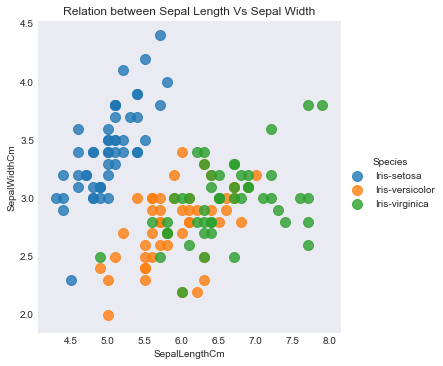

In [6]:
# Plotting the Scatter plot between Sepal Length and Sepal Width of Iris Flower
sns.lmplot('SepalLengthCm', 'SepalWidthCm', 
           data = iris, 
           fit_reg = False, 
           hue = 'Species', 
           scatter_kws = {'marker': 'D', 's': 100})
plt.title("Relation between Sepal Length Vs Sepal Width")

Text(0.5,1,'Relation between Petal Length Vs Petal Width')

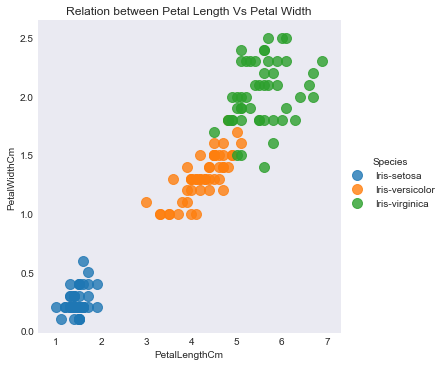

In [7]:
# Plotting the Scatter plot between Petal Length and Petal Width of Iris Flower
sns.lmplot('PetalLengthCm', 'PetalWidthCm', 
           data = iris, 
           fit_reg = False, 
           hue = 'Species', 
           scatter_kws = {'marker': 'D', 's': 100})
plt.title("Relation between Petal Length Vs Petal Width")

In [16]:
# Calling the LabelEncoder for Iris Species

le = LabelEncoder()
iris['Species']= le.fit_transform(iris['Species'])
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,0
2,4.9,3.0,1.4,0.2,0
3,4.7,3.2,1.3,0.2,0
4,4.6,3.1,1.5,0.2,0
5,5.0,3.6,1.4,0.2,0


In [17]:
# Train_Test_Split of Iris Dataset
x = iris.drop('Species', axis = 1)
y = iris.Species
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.30)

In [19]:
# Calling the logistic regression to the Dataset

logit = LogisticRegression()
logit.fit(xtrain, ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [20]:
train = print(logit.predict(xtest))
print('\n')
test = print(logit.predict(xtrain))

[2 2 1 2 1 0 0 0 2 2 2 2 2 2 2 2 0 0 1 0 1 0 2 0 0 0 1 0 1 1 0 2 1 0 0 0 1
 0 2 1 0 2 0 2 2]


[2 0 1 0 2 0 2 0 2 2 1 2 1 2 2 0 1 2 2 1 1 0 0 1 0 1 2 0 1 1 2 2 2 2 2 1 0
 2 1 1 1 1 1 2 2 2 1 0 2 1 0 1 1 0 0 0 0 2 1 0 2 0 0 1 0 2 1 0 1 1 0 0 0 0
 1 2 0 0 1 0 1 1 1 0 1 2 1 2 2 2 0 1 2 1 2 0 2 2 1 1 0 2 2 1 2]


In [23]:
print(accuracy_score(ytest, logit.predict(xtest)))

0.933333333333


In [27]:
score_logit = cross_val_score(logit, x.values, y.values, cv=5)
print("Cross Validation score : " + str(score_logit))
print("Cross Validation Mean score : " + str(score_logit.mean()))

Cross Validation score : [ 1.          0.96666667  0.93333333  0.9         1.        ]
Cross Validation Mean score : 0.96


In [28]:
# Calling the Decision Tree to the Dataset

dtc = DecisionTreeClassifier(criterion = 'gini', max_depth = 11)
dtc.fit(xtrain, ytrain)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=11,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [29]:
print(dtc.predict(xtest))
print('\n')
print(dtc.predict(xtrain))

[2 2 1 2 1 0 0 0 2 2 2 2 2 2 2 1 0 0 1 0 1 0 2 0 0 0 2 0 1 1 0 1 1 0 0 0 1
 0 2 1 0 2 0 2 2]


[2 0 1 0 2 0 2 0 2 2 2 2 1 2 2 0 1 2 2 1 1 0 0 1 0 1 2 0 1 1 2 2 2 2 1 1 0
 2 1 1 1 1 1 2 2 2 1 0 1 1 0 1 1 0 0 0 0 2 1 0 2 0 0 1 0 2 1 0 1 1 0 0 0 0
 1 2 0 0 1 0 1 1 1 0 1 2 1 2 2 1 0 1 2 1 2 0 2 2 1 1 0 2 2 1 2]


In [30]:
print(metrics.accuracy_score(ytest, dtc.predict(xtest)))

1.0


In [31]:
score_dtc = cross_val_score(dtc, x.values, y.values, cv=5)
print("Cross Validation score : " + str(score_dtc))
print("Cross Validation Mean score : " + str(score_dtc.mean()))

Cross Validation score : [ 0.96666667  0.96666667  0.9         1.          1.        ]
Cross Validation Mean score : 0.966666666667


In [33]:
# Calling the random forest to the Dataset

rfc = RandomForestClassifier(n_estimators = 1000, criterion = 'gini', max_depth = 3)
                             
rfc.fit(xtrain, ytrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [34]:
print(rfc.predict(xtest))
print('\n')
print(rfc.predict(xtrain))

[2 2 1 2 1 0 0 0 2 2 2 2 2 2 2 1 0 0 1 0 1 0 2 0 0 0 1 0 1 1 0 1 1 0 0 0 1
 0 2 1 0 2 0 2 2]


[2 0 1 0 2 0 2 0 2 2 2 2 1 2 2 0 1 2 1 1 1 0 0 1 0 1 2 0 2 1 2 2 2 2 1 1 0
 2 1 1 1 1 1 2 2 2 1 0 2 1 0 1 1 0 0 0 0 2 1 0 2 0 0 1 0 2 1 0 1 1 0 0 0 0
 1 2 0 0 1 0 1 1 1 0 1 2 1 2 2 1 0 1 2 1 1 0 2 2 1 1 0 2 2 1 2]


In [35]:
print(metrics.accuracy_score(ytest, rfc.predict(xtest)))

0.977777777778


In [36]:
score_rfc = cross_val_score(rfc, x.values, y.values, cv=5)
print("Cross Validation score : " + str(score_rfc))
print("Cross Validation Mean score : " + str(score_rfc.mean()))

Cross Validation score : [ 0.96666667  0.96666667  0.93333333  0.9         1.        ]
Cross Validation Mean score : 0.953333333333


In [73]:
# Extra Trees Classifier Model
etc = ExtraTreesClassifier(criterion = 'entropy', n_estimators = 1000)
etc.fit(xtrain, ytrain)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='entropy',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [74]:
score_etc = cross_val_score(etc, x.values, y.values, cv=5)
print("Cross Validation score : " + str(score_etc))
print("Cross Validation Mean score : " + str(score_etc.mean()))

Cross Validation score : [ 0.96666667  0.96666667  0.9         0.93333333  1.        ]
Cross Validation Mean score : 0.953333333333


In [41]:
# SVM Model
svc = SVC()
svc.fit(xtrain, ytrain)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [42]:
score_svc = cross_val_score(svc, x.values, y.values, cv=5)
print("Cross Validation score : " + str(score_svc))
print("Cross Validation Mean score : " + str(score_svc.mean()))

Cross Validation score : [ 0.96666667  1.          0.96666667  0.96666667  1.        ]
Cross Validation Mean score : 0.98


In [48]:
# KNN Model
knn = KNeighborsClassifier(n_neighbors = 11, weights = 'distance')
knn.fit(xtrain, ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=11, p=2,
           weights='distance')

In [49]:
score_knn = cross_val_score(knn, x.values, y.values, cv=5)
print("Cross Validation score : " + str(score_knn))
print("Cross Validation Mean score : " + str(score_knn.mean()))

Cross Validation score : [ 0.96666667  1.          1.          0.96666667  1.        ]
Cross Validation Mean score : 0.986666666667


In [51]:
# Gradient Boosting Model
gbc = GradientBoostingClassifier()
gbc.fit(xtrain, ytrain)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [52]:
score_gbc = cross_val_score(gbc, x.values, y.values, cv=5)
print("Cross Validation score : " + str(score_gbc))
print("Cross Validation Mean score : " + str(score_gbc.mean()))

Cross Validation score : [ 0.96666667  0.96666667  0.93333333  0.93333333  1.        ]
Cross Validation Mean score : 0.96


In [62]:
# Xgboost Model
xgb = XGBClassifier(learning_rate = 0.01, n_estimators = 1000)
xgb.fit(xtrain, ytrain)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.01, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=1000, nthread=-1,
       objective='multi:softprob', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [63]:
score_xgb = cross_val_score(xgb, x.values, y.values, cv=5)
print("Cross Validation score : " + str(score_xgb))
print("Cross Validation Mean score : " + str(score_xgb.mean()))

Cross Validation score : [ 0.96666667  0.96666667  0.93333333  0.9         1.        ]
Cross Validation Mean score : 0.953333333333
